# Distribution

In [116]:
import pandas as pd
import numpy as np
#ggplot equivalent: plotnine
from plotnine import *
#scales package equivalent: mizani
from mizani.breaks import *
from mizani.formatters import *

## Histogram
The standard way to show a statistical distribution - keep the gaps between columns small to highlight the 'shape' of the data.

In [15]:
df = pd.read_csv('data/histogram.csv')
df.head()

,Bin,CountV
0,68,1
1,66,1
2,64,2
3,62,8
4,60,15


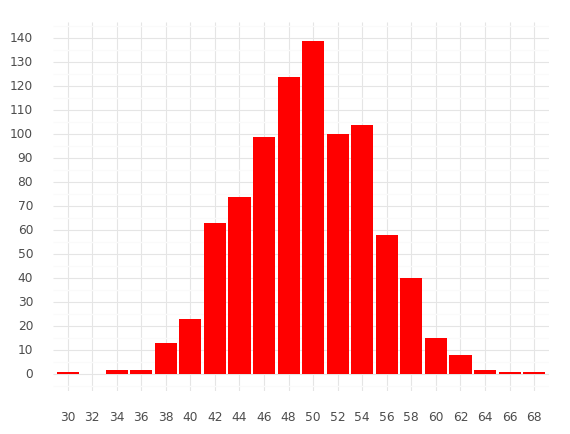

<ggplot: (8795229700279)>

In [27]:
g = (ggplot(df,aes(x='factor(Bin)',y='CountV')) + #treat bin as factor not numerical
     geom_col(fill='red') + #change bar colors
     theme_minimal() + #minimal theme
     labs(x='',y='') + #no labels
     scale_y_continuous(limits=(0,140),breaks=range(0,141,10),labels=range(0,141,10)) #y-axis ticks
    )
g

In [33]:
vals=[]
for i in range(df.shape[0]):
    for j in range(df['CountV'][i]):
        vals.append(df['Bin'][i])
df2 = pd.DataFrame({'idx':range(len(vals)), 'val':vals})
df2.head()

,idx,val
0,0,68
1,1,66
2,2,64
3,3,64
4,4,62


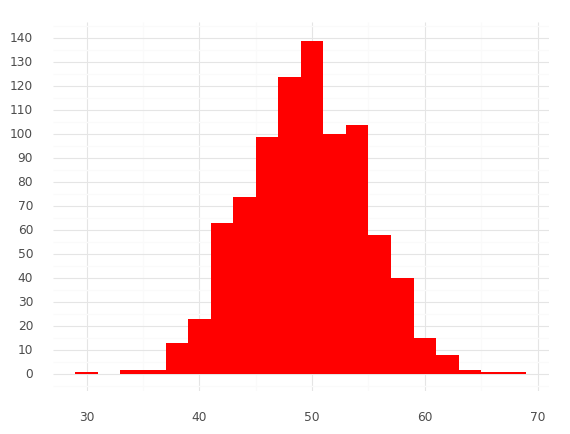

<ggplot: (-9223363241625506188)>

In [38]:
g = (ggplot(df2,aes(x='val')) + #treat bin as factor not numerical
     geom_bar(stat='bin',bins=20, fill='red') + #use geom_bar for histogram
     theme_minimal() + #minimal theme
     labs(x='',y='') + #no labels
     scale_y_continuous(limits=(0,140),breaks=range(0,141,10),labels=range(0,141,10)) #y-axis ticks
    )
g

## Dot plot
A simple way of showing the range (min/median/max) of data across multiple categories.

In [39]:
df = pd.read_csv('data/dot-plot.csv')
df.head()

,Sub-Category,Year,Profit
0,Supplies,2018,-955.31
1,Storage,2018,7402.80
2,Paper,2018,12040.84
3,Labels,2018,1744.61
4,Fasteners,2018,304.95


In [59]:
#aggregate to get min, median and max
agg_df = df.groupby('Sub-Category').agg({'Profit':[np.min,np.median,np.max]}).reset_index()
agg_df.columns = ['Sub-Category','min','median','max']
agg_df

,Sub-Category,min,median,max
0,Appliances,2511.90,5301.34,7865.27
1,Art,1413.96,1485.06,2221.96
2,Binders,7596.67,7669.74,10215.63
3,Envelopes,1441.76,1960.19,2066.75
4,Fasteners,171.94,294.07,304.95
5,Labels,1192.61,1323.03,1744.61
6,Paper,6570.17,9071.53,12040.84
7,Storage,3505.46,6204.29,7402.80
8,Supplies,-955.31,-698.96,-24.88


In [61]:
#melt
agg_m = agg_df.melt(id_vars='Sub-Category')
agg_m.head()

,Sub-Category,variable,value
0,Appliances,min,2511.90
1,Art,min,1413.96
2,Binders,min,7596.67
3,Envelopes,min,1441.76
4,Fasteners,min,171.94


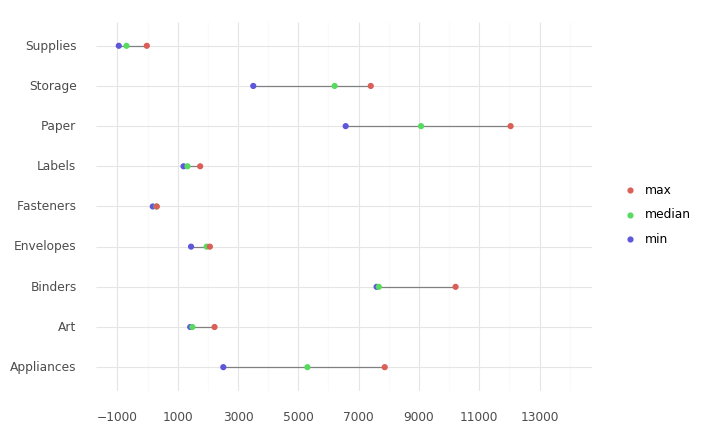

<ggplot: (8795233493894)>

In [78]:
g = (ggplot(agg_m,aes(x='Sub-Category',y='value',color='variable',group='Sub-Category')) + 
     geom_line(color='grey') + geom_point() + theme_minimal() + coord_flip() +
     scale_y_continuous(limits=(agg_m.value.min(),14000), 
                        breaks=range(-1000,14000,2000)) + #y-axis ticks
     labs(color='', x='',y=''))
g

## Dot strip plot
Good for showing individual values in a distribution, can be a problem when too many dots have the same value.

In [79]:
df = pd.read_csv('data/dot-strip-plot.csv')
df.head()

,Month of Order Date,Sub-Category,Sales
0,January,Accessories,5477.91
1,February,Accessories,5369.28
2,March,Accessories,8766.64
3,April,Accessories,7951.71
4,May,Accessories,9613.10


In [120]:
#custom formatter
class k_format(custom_format):
    def k_ize(self,x):
        #format one tick
        return f'{int(x/1000)}k'
    def __call__(self,x):
        #format a list of ticks
        return [self.k_ize(i) for i in x]
f = k_format()

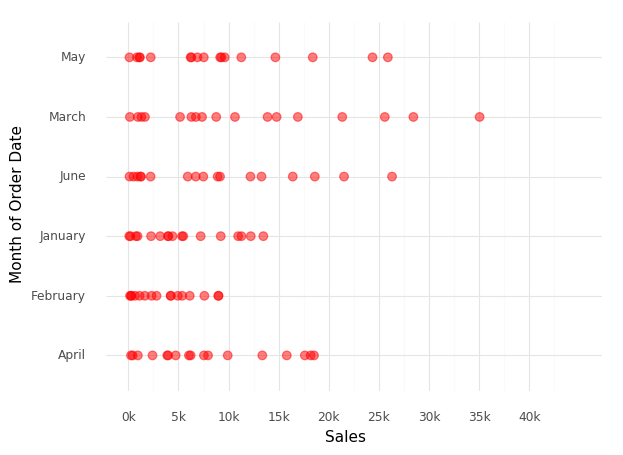

<ggplot: (8795229363446)>

In [118]:
g = (ggplot(df, aes(x='Month of Order Date',y='Sales')) + 
     geom_point(alpha=0.5,color='red',size=3) + #points with decorations
     theme_minimal() + coord_flip() +
     scale_y_continuous(limits=(0,45000),breaks=range(0,45000,5000),
                       labels=f) 
    )
g

## Barcode plot
Like dot strip plots, good for displaying all the data in a table,they work best when highlighting individual values.

In [119]:
df = pd.read_csv('data/barcode-plot.csv')
df.head()

,State,Sub-Category,Avg Sales
0,Wisconsin,Supplies,21.81
1,Wisconsin,Storage,111.91
2,Wisconsin,Paper,154.72
3,Wisconsin,Labels,29.64
4,Wisconsin,Fasteners,1.81


In [125]:
#custom formatter
class k_format(custom_format):
    def k_ize(self,x):
        #format one tick
        return f'{round(x/1000,1)}k'
    def __call__(self,x):
        #format a list of ticks
        return [self.k_ize(i) for i in x]
f = k_format()

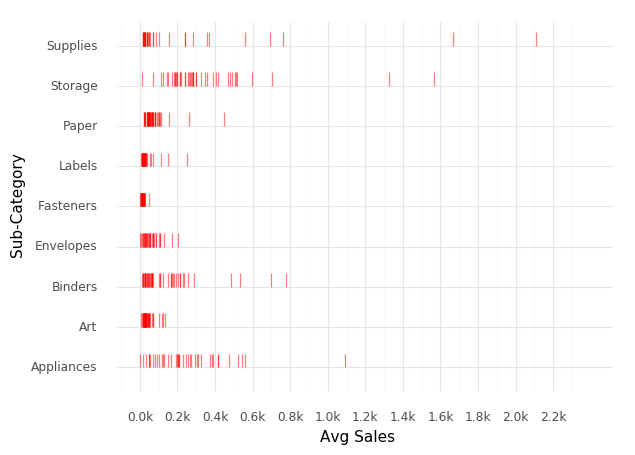

<ggplot: (8795229129557)>

In [138]:
g = (ggplot(df, aes(x='Sub-Category',y='Avg Sales')) + 
     geom_jitter(alpha=0.5,color='red',size=5, 
                 position=position_dodge(0.8),
                 shape=2) + #jitter with shape selection
     theme_minimal() + coord_flip() +
     scale_y_continuous(limits=(0,2400),breaks=range(0,2400,200),
                       labels=f) 
    )
g

## Boxplot
Summarise multiple distributions by showing the median (centre) and range of the data.

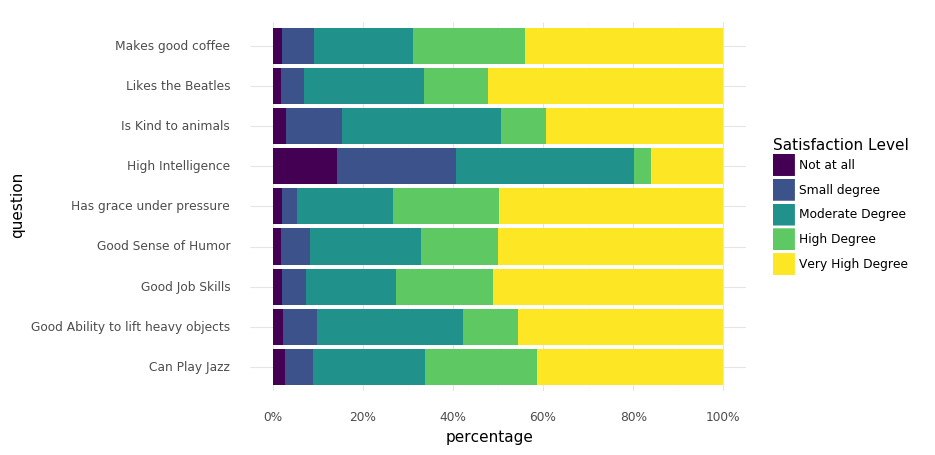

<ggplot: (-9223363281281404072)>

In [93]:
g = (ggplot(df, aes(x='question',y='percentage', fill='_1')) + #baseplot
    geom_col() + #type of plot
    coord_flip() + #flip coordinates
    theme_minimal() + #theme
     
    #legend customizaation
    guides(fill = guide_legend()) + #use guide_legend instead of guide_colorbar
    labs(fill='Satisfaction Level') + #legend title
    scale_fill_continuous(labels=list(df.type.unique())) + #
     
    #tick customization
    scale_y_continuous(breaks=[i/100 for i in range(0,110,20)],   #breaks
                       limits=(0,1),                              #limits
                       labels=[f'{i}%' for i in range(0,110,20)]) #labels
    ) 
g

## Spine
Splits a single value into 2 contrasting components (eg Male/Female)

In [187]:
df = pd.read_csv('data/spine.csv')
#make women negative and men positive
df['Response'] = df.apply(lambda x: -x['Response'] if x['Gender']=='Women' else x['Response'], 1)
df.head()

,Gender,Nationality,Response
0,Women,UAE,-0.331337
1,Women,Saudi Arabian,-0.429000
2,Women,Malaysian,-0.460717
3,Women,Vietnamese,-0.469591
4,Women,Indonesian,-0.484211


In [188]:
df.tail()

,Gender,Nationality,Response
35,Men,German,0.486275
36,Men,British,0.484152
37,Men,Swedish,0.483712
38,Men,Hong Kong,0.480357
39,Men,French,0.477833


In [189]:
#order countries by women's responses
women_df = df[df.Gender=='Women'].copy()
women_df['rnk'] = women_df['Response'].argsort().map(lambda x: str(x).zfill(2)+'_')
women_df['Nationality_'] = women_df['rnk'] + women_df['Nationality'] 
women_df.drop(['rnk','Gender','Response'],1,inplace=True)
women_df

,Nationality,Nationality_
0,UAE,19_UAE
1,Saudi Arabian,18_Saudi Arabian
2,Malaysian,17_Malaysian
3,Vietnamese,16_Vietnamese
4,Indonesian,15_Indonesian
5,Indian,14_Indian
6,Egyptian,13_Egyptian
7,Filipino,12_Filipino
8,Norwegian,11_Norwegian
9,Finnish,10_Finnish


In [190]:
#merge new nation labels to main df
df = df.merge(women_df)
df.head()

,Gender,Nationality,Response,Nationality_
0,Women,UAE,-0.331337,19_UAE
1,Men,UAE,0.668663,19_UAE
2,Women,Saudi Arabian,-0.429000,18_Saudi Arabian
3,Men,Saudi Arabian,0.571000,18_Saudi Arabian
4,Women,Malaysian,-0.460717,17_Malaysian


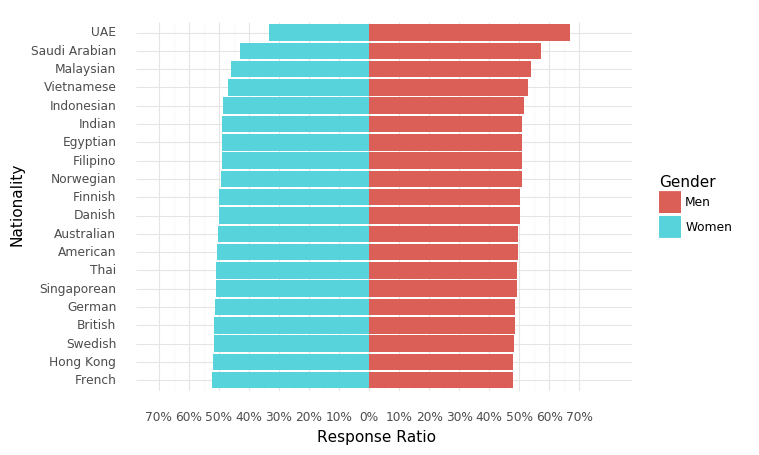

<ggplot: (8755573863779)>

In [192]:
g = (ggplot(df, aes(x='Nationality_',y='Response', fill='Gender')) + #baseplot
    geom_col() + #type of plot
    coord_flip() + #flip coordinates
    theme_minimal()  +#theme
    scale_x_discrete(labels=list(df.Nationality.unique())[::-1]) + #cusotmize x-axis labels
    scale_y_continuous(breaks=[i/100 for i in range(-70,80,10)],   #breaks
                       limits=(-0.7,0.8),                              #limits
                       labels=[f'{abs(i)}%' for i in range(-70,80,10)]) + #labels
    labs(x='Nationality', y ='Response Ratio')
    ) 
g

## Surplus/deficit filled line
The shaded area of these charts allows a balance to be shown; either against a baseline or between two series

In [194]:
df = pd.read_csv('data/surplus-deficit-filled-line.csv')
df['surplus'] = df.MonthlyAvg.map(lambda x: True if x>0 else False)
df.head()

,Date,MonthlyAvg,surplus
0,2015-01-01,-33621.456256,False
1,2015-02-01,-43338.459256,False
2,2015-03-01,7832.657744,True
3,2015-04-01,-19563.006256,False
4,2015-05-01,-24210.064256,False


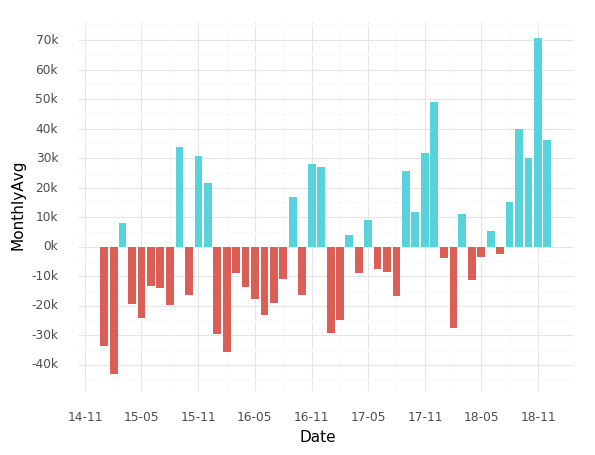

<ggplot: (-9223363281282218692)>

In [214]:
g = (ggplot(df, aes(x='Date',y='MonthlyAvg',fill='surplus')) +
    geom_col() + theme_minimal() + theme(legend_position='none') +
    scale_x_date(breaks = date_breaks('6 month'), labels = date_format("%y-%m")) + #date formating
    scale_y_continuous(breaks = range(-40000,80000,10000), 
                      labels = [f'{int(i/1000)}k' for i in range(-40000,80000,10000)]) #format y-axis
    ) 
g

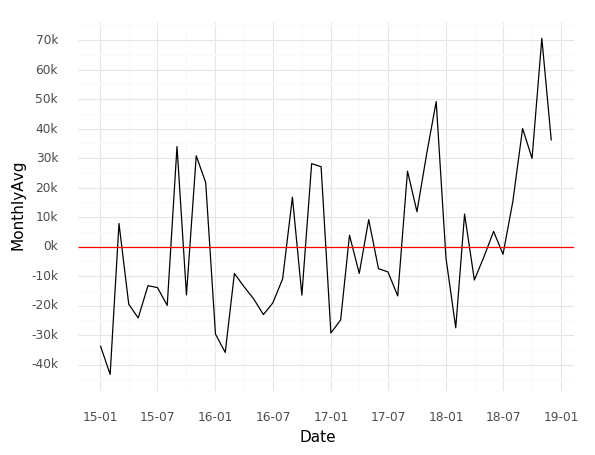

<ggplot: (-9223363281280887338)>

In [250]:
g = (ggplot(df, aes(x='Date',y='MonthlyAvg',group=1)) +
    geom_line() + #use line instead
    theme_minimal() + theme(legend_position='none') +
    geom_hline(aes(yintercept=0), color='red') + #horizontal line
    scale_x_date(breaks = date_breaks('6 month'), labels = date_format("%y-%m")) + #date formating
    scale_y_continuous(breaks = range(-40000,80000,10000), 
                      labels = [f'{int(i/1000)}k' for i in range(-40000,80000,10000)]) #format y-axis
    ) 
g